<a href="https://colab.research.google.com/github/Sedinei/DSWP/blob/master/NB_trabalhado/Titanic_NB10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dicionário de dados do dataframe df_Titanic:
* PassengerID: ID do passageiro;
* survived: Indicador, sendo 1= Passageiro sobreviveu e 0= Passageiro morreu;
* Pclass: Classe;
* Age: Idade do Passageiro;
* SibSp: Número de parentes a bordo (esposa, irmãos, pais e etc);
* Parch: Número de pais/crianças a bordo;
* Fare: Valor pago pelo Passageiro;
* Cabin: Cabine do Passageiro;
* Embarked: A porta pelo qual o Passageiro embarcou.
* Name: Nome do Passageiro;
* sex: sexo do Passageiro.

In [125]:
# carregar a library Pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [113]:
# Ajusta as configurações do Pandas e do Seaborn
d_configuracao = {
    'display.max_columns': 1000,
    'display.expand_frame_repr': True,
    'display.max_rows': 10,
    'display.precision': 2,
    'display.show_dimensions': True
                  }

for op, value in d_configuracao.items():
    pd.set_option(op, value)

sns.set_theme(style='dark')

___
## Exercício 1
* Ler o dataframe Titanic.csv;
* Definir 'PassengerId' como índice/chave da tabela através do comando index_col= 'PassengerId'.

In [3]:
url = 'https://raw.githubusercontent.com/Sedinei/DSWP/master/Dataframes/Titanic_With_MV.csv'
df_Titanic = pd.read_csv(url, index_col = 'PassengerId')
df_Titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


___
## Exercício 2
* Passar os nomes das colunas e os dados para minúsculas.

In [4]:
# Deixando os nomes das colunas em minúsculas e os dados do DataFrame
df_Titanic.columns = [col.lower() for col in df_Titanic.columns]
# Altera o nome do índice
indice = df_Titanic.index
indice.name = indice.name.lower()
df_Titanic.index = indice
df_Titanic = df_Titanic.applymap(lambda x: x.lower() if type(x) == str else x)
df_Titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
passengerid,,,,,,,,,,,
1,0,3,"braund, mr. owen harris",male,22.0,1,0,a/5 21171,7.25,NaN,s
2,1,1,"cumings, mrs. john bradley (florence briggs th...",female,38.0,1,0,pc 17599,71.28,c85,c
3,1,3,"heikkinen, miss. laina",female,26.0,0,0,ston/o2. 3101282,7.92,NaN,s
4,1,1,"futrelle, mrs. jacques heath (lily may peel)",female,35.0,1,0,113803,53.10,c123,s
5,0,3,"allen, mr. william henry",male,35.0,0,0,373450,8.05,NaN,s


___
## Exercício 3
* Identifique e delete os atributos do dataframe df_Titanic que podem ser excluídos inicialmente no início da análise de dados.

In [7]:
# Os atributos que provavelmente não trariam nenhuma informação útil seriam ticket e cabin
df_Titanic.drop(columns=['ticket', 'cabin'], inplace=True)
df_Titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked
passengerid,,,,,,,,,
1,0,3,"braund, mr. owen harris",male,22.0,1,0,7.25,s
2,1,1,"cumings, mrs. john bradley (florence briggs th...",female,38.0,1,0,71.28,c
3,1,3,"heikkinen, miss. laina",female,26.0,0,0,7.92,s
4,1,1,"futrelle, mrs. jacques heath (lily may peel)",female,35.0,1,0,53.10,s
5,0,3,"allen, mr. william henry",male,35.0,0,0,8.05,s


___
## Exercício 4
* Carregue o dataframe Titanic_With_MV.csv e analise o dataframe em busca de inconsistências e Missing Values (NaN).

In [67]:
url_Titanic_WMV = 'https://github.com/Sedinei/DSWP/raw/master/Dataframes/Titanic_With_MV.csv'
df_Titanic_WMV = pd.read_csv(url_Titanic_WMV, index_col='PassengerId')

# Verificando a quantidade de missing values
df_Titanic_WMV.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Há missing values em 'Age' (177), em 'Cabin' (687) e em 'Embarked' (2)

In [68]:
# Explorando a quantidade de itens únicos
for i, v in df_Titanic_WMV.nunique().iteritems():
    print(f'{i}:  {v}')

Survived:  2
Pclass:  3
Name:  891
Sex:  14
Age:  88
SibSp:  7
Parch:  7
Ticket:  681
Fare:  248
Cabin:  147
Embarked:  3


* Deve haver 21 valores de 'Ticket' repetidos;
* Deve haver 57 valores de 'Cabin' repetidos;

* **Há 14 valores distintos para 'Sex' o que é muito estranho, pois deveria haver apenas 2 valores**

In [69]:
# Explorando as quantidade de valores distintos de 'Sex'
for i, v in df_Titanic_WMV['Sex'].value_counts().iteritems():
    print(f'{i}:  {v}')

male:  567
female:  306
m:  4
M:  3
f:  2
W:  1
MALE:  1
fEMALE:  1
F:  1
Men:  1
Female:  1
Woman:  1
mALE:  1
w:  1


In [70]:
# Para evitar perda de dados, criei uma nova coluna para trabalhar ('Work_Sex')
# Coloquei em 'Work_Sex' os valores de 'Sex' em maiúsculas e peguei o primeiro valor
# Espero ter os seguintes valores: M, para masculino, M e W, para feminino
df_Titanic_WMV['Work_Sex'] = df_Titanic_WMV['Sex'].str.upper().str.get(0)
df_Titanic_WMV['Work_Sex'].value_counts()

M    577
F    311
W      3
Name: Work_Sex, Length: 3, dtype: int64

In [72]:
# Transformo os valores W em F, deixando igual os M e F
# Espero agora só ter M e F
df_Titanic_WMV['Work_Sex'] = df_Titanic_WMV['Work_Sex'].map(lambda x: 'F' if x == 'W' else x)
df_Titanic_WMV['Work_Sex'].value_counts()

M    577
F    314
Name: Work_Sex, Length: 2, dtype: int64

In [73]:
# Substituo os valores de 'Sex' pelos de 'Work_Sex' e excluo 'Work_Sex'
df_Titanic_WMV['Sex'] = df_Titanic_WMV['Work_Sex']
df_Titanic_WMV.drop(columns='Work_Sex', inplace=True)
df_Titanic_WMV.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",F,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",M,35.0,0,0,373450,8.05,NaN,S


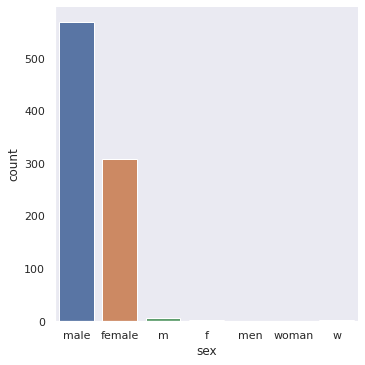

In [115]:
sns.catplot(x="sex", kind="count", data = df_Titanic)

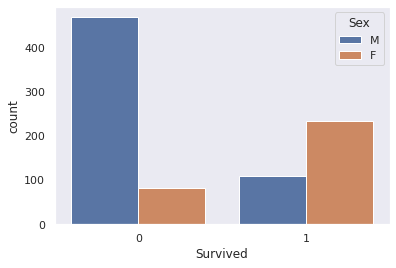

In [114]:
# Analisando a relação entre 'Sex' e 'Survived'
sns.countplot(x = 'Survived', hue ='Sex', data = df_Titanic_WMV)

___
## Exercício 5
* Com a coluna 'cabin', construir as colunas:
    * deck - Letra de Cabin;
    * seat - Número de Cabin

In [75]:
# Explorando os valores de 'Cabin'
df_Titanic_WMV.loc[df_Titanic_WMV['Cabin'].notna(), 'Cabin'].head(20)

PassengerId
2             C85
4            C123
7             E46
11             G6
12           C103
         ...     
76          F G73
89    C23 C25 C27
93            E31
97             A5
98        D10 D12
Name: Cabin, Length: 20, dtype: object

In [76]:
# Criei uma função que quebra o conteúdo de 'Cabin' em decks e seats
# Verifiquei que há casos nos quais há mais de uma cabine em 'Cabin'
# Há também muitos NaN
def deck_seat(cabins):
    # Verifica se não é um NaN
    if type(cabins) != str: return 'NaN', 'NaN'
    decks = []
    seats = []
    cabins = cabins.split()
    for cabin in cabins:
        decks.append(cabin[0])
        if len(cabin) == 1: seats.append('NaN')
        else: seats.append(cabin[1:])
    
    return ','.join(decks), ','.join(seats)

In [78]:
# Aplica a função em 'Cabin' usando map
# Com o zip consiguimos atribuir os múltiplos valores às duas colunas ao mesmo tempo
df_Titanic_WMV['Deack'], df_Titanic_WMV['Seat'] = zip(*df_Titanic_WMV['Cabin'].map(deck_seat))
df_Titanic_WMV.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deack,Seat
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7.25,NaN,S,NaN,NaN
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,PC 17599,71.28,C85,C,C,85
3,1,3,"Heikkinen, Miss. Laina",F,26.0,0,0,STON/O2. 3101282,7.92,NaN,S,NaN,NaN
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,113803,53.10,C123,S,C,123
5,0,3,"Allen, Mr. William Henry",M,35.0,0,0,373450,8.05,NaN,S,NaN,NaN


In [65]:
# Verificando se os valores múltiplos de 'Cabin' foram corretamente trabalhados
df_Titanic_WMV[df_Titanic_WMV['Cabin'].str.contains(r'\s+', na=False, regex=True)][['Cabin', 'Deack', 'Seat']]

,Cabin,Deack,Seat
PassengerId,,,
28,C23 C25 C27,"C,C,C","23,25,27"
76,F G73,"F,G","NaN,73"
89,C23 C25 C27,"C,C,C","23,25,27"
98,D10 D12,"D,D","10,12"
119,B58 B60,"B,B","58,60"
...,...,...,...
743,B57 B59 B63 B66,"B,B,B,B","57,59,63,66"
764,B96 B98,"B,B","96,98"
790,B82 B84,"B,B","82,84"


___
## Exercício 6
* Criar a coluna 'sozinho_parch', onde sozinho_parch= 1 significa que o passageiro viaja sozinho e 0, caso contrário.

In [79]:
# Explorando os valores de 'Parch'
df_Titanic_WMV['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [ ]:
# Criando a coluna 'sozinho_parch'
df_Titanic_WMV['sozinho_parch'] = df_Titanic_WMV['Parch'].map(lambda x: 1 if x == 0 else 0)

In [86]:
# Verificando se há alguma atribuição incorreta para 'sozinho_parch' igual a 1
((df_Titanic_WMV['Parch'] == 0) & (df_Titanic_WMV['sozinho_parch'] != 1)).sum()

0

In [87]:
# Verificando se há alguma atribuição incorreta para 'sozinho_parch' igual a 0
((df_Titanic_WMV['Parch'] != 0) & (df_Titanic_WMV['sozinho_parch'] != 0)).sum()

0

___
## Exercício 7
* Criar o atributo 'sozinho_sibsp', onde sozinho= 1 significa que o passageiro viaja sozinho e 0, caso contrário.

In [88]:
# Explorando os valores de 'SibSp'
df_Titanic_WMV['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [89]:
# Criando a coluna 'sozinho_sibsp'
df_Titanic_WMV['sozinho_sibsp'] = df_Titanic_WMV['SibSp'].map(lambda x: 1 if x == 0 else 0)

In [90]:
# Verificando se há alguma atribuição incorreta para 'sozinho_sibsp' igual a 1
((df_Titanic_WMV['SibSp'] == 0) & (df_Titanic_WMV['sozinho_sibsp'] != 1)).sum()

0

In [91]:
# Verificando se há alguma atribuição incorreta para 'sozinho_sibsp' igual a 0
((df_Titanic_WMV['SibSp'] != 0) & (df_Titanic_WMV['sozinho_sibsp'] != 0)).sum()

0

___
## Exercício 8
* Discretizar a coluna 'fare' em 10 buckets.

In [92]:
# Explorando a coluna 'Fare'
df_Titanic_WMV['Fare'].describe()

count    891.00
mean      32.20
std       49.69
min        0.00
25%        7.91
50%       14.45
75%       31.00
max      512.33
Name: Fare, Length: 8, dtype: float64

In [94]:
# Atribuindo o valor de cut de 'Fare' na coluna 'Disc_Fare'
df_Titanic_WMV['Disc_Fare'] = pd.cut(df_Titanic_WMV['Fare'], bins=10, precision=2, include_lowest=True)
df_Titanic_WMV[['Fare', 'Disc_Fare']].head(20)

,Fare,Disc_Fare
PassengerId,,
1,7.25,"(-0.52, 51.23]"
2,71.28,"(51.23, 102.47]"
3,7.92,"(-0.52, 51.23]"
4,53.10,"(51.23, 102.47]"
5,8.05,"(-0.52, 51.23]"
...,...,...
16,16.00,"(-0.52, 51.23]"
17,29.12,"(-0.52, 51.23]"
18,13.00,"(-0.52, 51.23]"


___
## Exercício 9
* Discretizar a coluna 'age'.

In [96]:
# Explorando os valores de 'Age'
df_Titanic_WMV['Age'].describe()

count    714.00
mean      29.70
std       14.53
min        0.42
25%       20.12
50%       28.00
75%       38.00
max       80.00
Name: Age, Length: 8, dtype: float64

In [98]:
# Preenchendo os missing values com a média das idades
df_Titanic_WMV['Age'] = df_Titanic_WMV['Age'].fillna(df_Titanic_WMV['Age'].mean())

In [99]:
# Verificando as novas características de 'Age'
df_Titanic_WMV['Age'].describe()

count    891.00
mean      29.70
std       13.00
min        0.42
25%       22.00
50%       29.70
75%       35.00
max       80.00
Name: Age, Length: 8, dtype: float64

In [100]:
# Atribuindo o valor de cut (8 buckets ~ 10 anos cada) de 'Age' na coluna 'Disc_Age'
df_Titanic_WMV['Disc_Age'] = pd.cut(df_Titanic_WMV['Age'], bins=8, precision=0, include_lowest=True)
df_Titanic_WMV[['Age', 'Disc_Age']].head(20)

,Age,Disc_Age
PassengerId,,
1,22.0,"(20.0, 30.0]"
2,38.0,"(30.0, 40.0]"
3,26.0,"(20.0, 30.0]"
4,35.0,"(30.0, 40.0]"
5,35.0,"(30.0, 40.0]"
...,...,...
16,55.0,"(50.0, 60.0]"
17,2.0,"(-1.0, 10.0]"
18,29.7,"(20.0, 30.0]"


___
## Exercício 10
* Capturar os títulos 'Ms', 'Mr' e etc contidos na coluna 'Name' e colocar na coluna 'Title'.

In [104]:
# Explorando os valores de 'Name'
df_Titanic_WMV['Name'].head(30)

PassengerId
1                               Braund, Mr. Owen Harris
2     Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                Heikkinen, Miss. Laina
4          Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                              Allen, Mr. William Henry
                            ...                        
26    Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...
27                              Emir, Mr. Farred Chehab
28                       Fortune, Mr. Charles Alexander
29                        O'Dwyer, Miss. Ellen "Nellie"
30                                  Todoroff, Mr. Lalio
Name: Name, Length: 30, dtype: object

In [105]:
# Extraindo o título de 'Name' para atribuir a 'Title'
df_Titanic_WMV['Title'] = df_Titanic_WMV['Name'].str.extract(r',\s*([Mris]+)\.\s*')
df_Titanic_WMV[['Title', 'Name']].head(20)

,Title,Name
PassengerId,,
1,Mr,"Braund, Mr. Owen Harris"
2,Mrs,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
3,Miss,"Heikkinen, Miss. Laina"
4,Mrs,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
5,Mr,"Allen, Mr. William Henry"
...,...,...
16,Mrs,"Hewlett, Mrs. (Mary D Kingcome)"
17,NaN,"Rice, Master. Eugene"
18,Mr,"Williams, Mr. Charles Eugene"


In [121]:
# A função do Nélio parece bem melhor, pois não notei que haviam outros títulos além de Mr, Miss e Mrs
def get_title(nome):
    if '.' in nome:
        return nome.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'

def title_map(title):
    if title in ['Mr', 'Ms']:
        return 1
    elif title in ['Master']:
        return 2
    elif title in ['Ms','Mlle','Miss']:
        return 3
    elif title in ["Mme", "Ms", "Mrs"]:
        return 4
    elif title in ["Jonkheer", "Don", "Sir", "the Countess", "Dona", "Lady"]:
        return 5
    elif title in ["Capt", "Col", "Major", "Dr", "Rev"]:
        return 6
    else:
        return 7

In [122]:
df_Titanic_WMV['Title_2'] = df_Titanic_WMV['Name'].apply(get_title).apply(title_map)  
set(df_Titanic_WMV['Title_2']) # Esse comando mostra os NaN's da variável

{1, 2, 3, 4, 5, 6}

___
## Exercício 11
* Qual a relação entre as variáveis e a variável-target?

In [107]:
# Verificando a matriz de correlações no que diz respeito à variável Survived
df_Titanic_WMV.corr()['Survived']

Survived         1.00
Pclass          -0.34
Age             -0.07
SibSp           -0.04
Parch            0.08
Fare             0.26
sozinho_parch   -0.15
sozinho_sibsp   -0.12
Name: Survived, Length: 8, dtype: float64

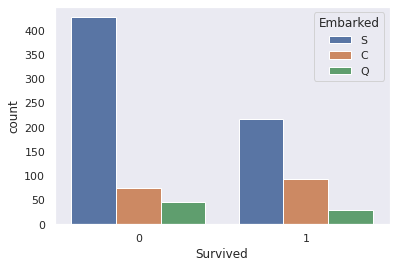

In [116]:
# Verificando as relações com a variável 'Embarked'
sns.countplot(x = 'Survived', hue ='Embarked', data = df_Titanic_WMV)

**Aparentemente quem embarcou na cidade de código 'S' teve bem menos de 50% de chances de sobreviver, enquanto que os que embarcaram nas outras cidades que tiveram aproximadamente 50% de chances de sobreviver.**

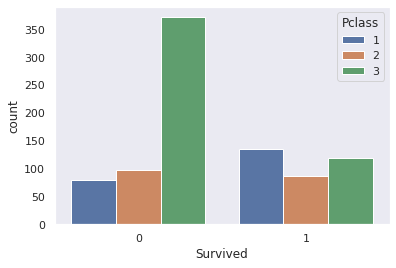

In [118]:
# Verificando as relações com a variável 'Pclass'
sns.countplot(x = 'Survived', hue ='Pclass', data = df_Titanic_WMV)

**Aparentemente quem estava na classe 1 teve um pouco mais de 50% de chances de sobreviver, enquanto quem estava na classe 3 teve bem menos de 50% de chanches de sobreviver.**

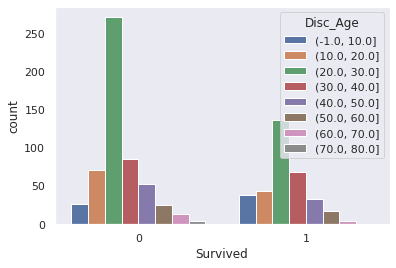

In [119]:
# Verificando as relações com a variável 'Disc_Age'
sns.countplot(x = 'Survived', hue ='Disc_Age', data = df_Titanic_WMV)

**Aparentemente quem tinha entre 20 e 30 anos teve bem menos de 50% de chances de sobreviver. Quem tinha entre 10 e 20 anos teve um pouco menos de 50% de chances de sobreviver. As outras faixas de idade tiveram aproximadamente 50% de chances de sobreviver.**

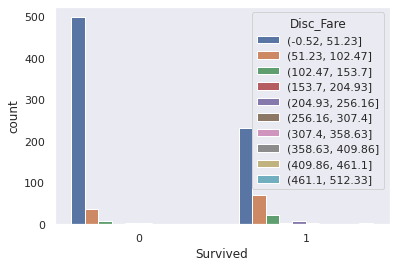

In [120]:
# Verificando as relações com a variável 'Disc_Fare'
sns.countplot(x = 'Survived', hue ='Disc_Fare', data = df_Titanic_WMV)

## Relação causa --> efeito

A função a seguir que o Nélio desenvolveu nos ajudará com o Data Visualization, cruzando a variável-resposta 'survived' com qualquer outra passada à função:

In [123]:
def taxa_sobrevivencia(df, column):
    title_xt = pd.crosstab(df[column], df['Survived'])
    print(pd.crosstab(df[column], df['Survived'], margins=True))
    title_xt_pct = title_xt.div(title_xt.sum(1).astype(float), axis =0)
    
    title_xt_pct.plot(kind='bar', stacked=True, title='Taxa de Sobrevivência dos Passageiros', 
                      color= ['r', 'g'])
    plt.xlabel(column)
    plt.ylabel('Taxa de Sobrevivência')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),shadow=True, ncol=2)
    plt.show()

def grafico_catplot(x, y, hue = 'Survived', col= None):
    plt.rcdefaults()
    g= sns.catplot(x= x, y= y, hue = hue, palette={'Died':'red','Survived':'blue'}, col= col, data = df, kind= 'bar', height=4, aspect=.7)
    plt.show()

Survived    0    1  All
Sex                    
F          81  233  314
M         468  109  577
All       549  342  891

[3 rows x 3 columns]


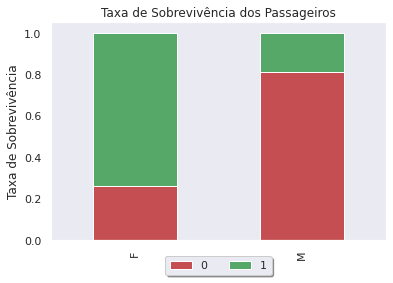

In [126]:
taxa_sobrevivencia(df_Titanic_WMV, 'Sex')

Survived    0    1  All
Pclass                 
1          80  136  216
2          97   87  184
3         372  119  491
All       549  342  891

[4 rows x 3 columns]


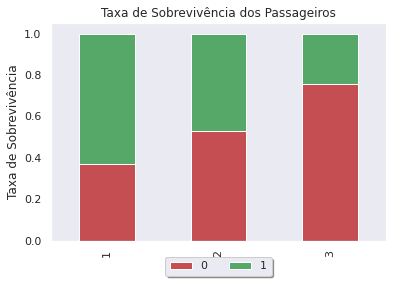

In [127]:
taxa_sobrevivencia(df_Titanic_WMV, 'Pclass')

Survived        0    1  All
Disc_Age                   
(-1.0, 10.0]   26   38   64
(10.0, 20.0]   71   44  115
(20.0, 30.0]  271  136  407
(30.0, 40.0]   86   69  155
(40.0, 50.0]   53   33   86
(50.0, 60.0]   25   17   42
(60.0, 70.0]   13    4   17
(70.0, 80.0]    4    1    5
All           549  342  891

[9 rows x 3 columns]


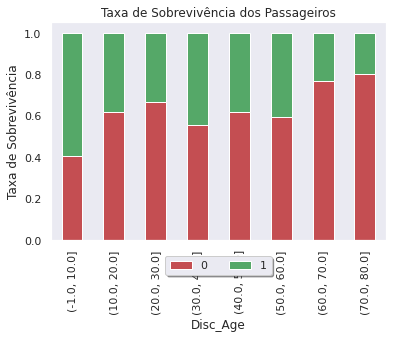

In [128]:
taxa_sobrevivencia(df_Titanic_WMV, 'Disc_Age')